In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa22/fifa22.csv


**Loading the Dataframe from fifa22.csv:**

In [ ]:
df = pd.read_csv('/kaggle/input/fifa22.csv')
print(df)

       sofifa_id          short_name                            long_name  \
0         158023            L. Messi       Lionel Andrés Messi Cuccittini   
1         188545      R. Lewandowski                   Robert Lewandowski   
2          20801   Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3         190871           Neymar Jr        Neymar da Silva Santos Júnior   
4         192985        K. De Bruyne                      Kevin De Bruyne   
...          ...                 ...                                  ...   
19234     261962           Song Defu                                  宋德福   
19235     262040           C. Porter                      Caoimhin Porter   
19236     262760            N. Logue              Nathan Logue-Cunningham   
19237     262820           L. Rudden                          Luke Rudden   
19238     264540  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  \
0

**STEP 1:**
remove the long name column

In [28]:
df.drop(columns=['long_name'],inplace=True)
print(df)

       sofifa_id          short_name player_positions  overall  potential  \
0         158023            L. Messi       RW, ST, CF       93         93   
1         188545      R. Lewandowski               ST       92         92   
2          20801   Cristiano Ronaldo           ST, LW       91         91   
3         190871           Neymar Jr          LW, CAM       91         91   
4         192985        K. De Bruyne          CM, CAM       91         91   
...          ...                 ...              ...      ...        ...   
19234     261962           Song Defu              CDM       47         52   
19235     262040           C. Porter               CM       47         59   
19236     262760            N. Logue               CM       47         55   
19237     262820           L. Rudden               ST       47         60   
19238     264540  E. Lalchhanchhuaha              CAM       47         60   

         value_eur  wage_eur  age  height_cm  
0       78000000.0  320000.0

**STEP 2**:
Convert the Short Name column to lowercase.

In [29]:
df['short_name']=df['short_name'].str.lower()
print(df)

       sofifa_id          short_name player_positions  overall  potential  \
0         158023            l. messi       RW, ST, CF       93         93   
1         188545      r. lewandowski               ST       92         92   
2          20801   cristiano ronaldo           ST, LW       91         91   
3         190871           neymar jr          LW, CAM       91         91   
4         192985        k. de bruyne          CM, CAM       91         91   
...          ...                 ...              ...      ...        ...   
19234     261962           song defu              CDM       47         52   
19235     262040           c. porter               CM       47         59   
19236     262760            n. logue               CM       47         55   
19237     262820           l. rudden               ST       47         60   
19238     264540  e. lalchhanchhuaha              CAM       47         60   

         value_eur  wage_eur  age  height_cm  
0       78000000.0  320000.0

**STEP 3:**
To obtain the 10 most valuable players

In [30]:
most_val=df.sort_values(by='value_eur',ascending=False)[:10]
print(most_val)


    sofifa_id           short_name player_positions  overall  potential  \
6      231747            k. mbappé           ST, LW       91         95   
29     239085           e. haaland               ST       88         93   
9      202126              h. kane               ST       90         90   
3      190871            neymar jr          LW, CAM       91         91   
4      192985         k. de bruyne          CM, CAM       91         91   
1      188545       r. lewandowski               ST       92         92   
43     228702           f. de jong      CM, CDM, CB       87         92   
21     230621        g. donnarumma               GK       89         93   
45     233049            j. sancho       RM, CF, LM       87         91   
44     231281  t. alexander-arnold               RB       87         92   

      value_eur  wage_eur  age  height_cm  
6   194000000.0  230000.0   22        182  
29  137500000.0  110000.0   20        194  
9   129500000.0  240000.0   27        188 

**STEP 4:**
Plot the counts of Overall and Potential columns.
NOTE: Bar graph is used as we have to plot frequencies of distinct categories

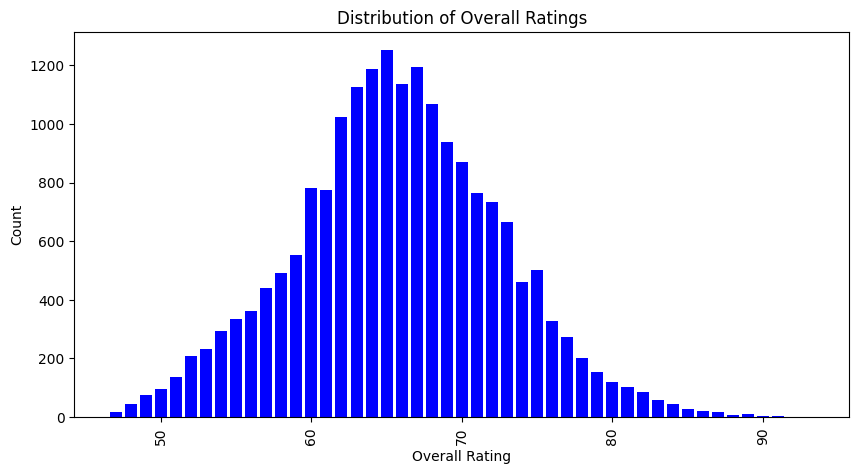

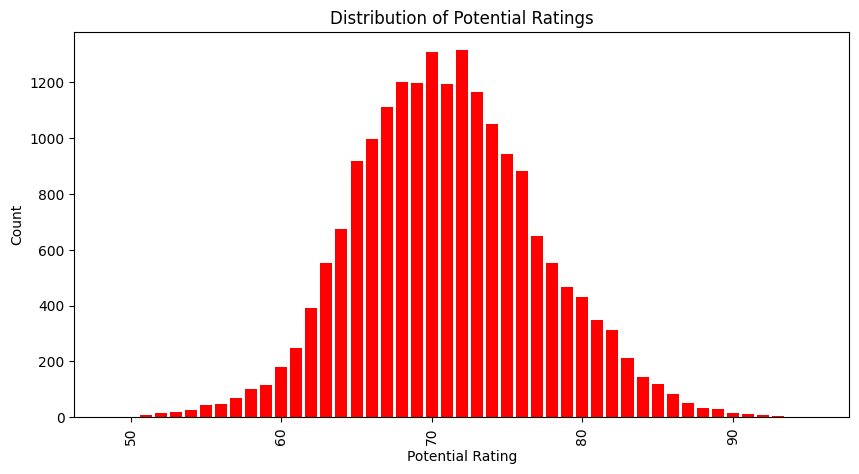

In [7]:
overall_count = dict(df['overall'].value_counts())
potential_count = dict(df['potential'].value_counts())

# Converting overall counts to lists
ratings = list(overall_count.keys())
frequencies = list(overall_count.values())

# Plot Overall ratings count
plt.figure(figsize=(10, 5))
plt.bar(ratings, frequencies, color='blue')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
#plt.xticks used so that the values in x axis do not overlap
plt.xticks(rotation=90)
plt.show()

# Converting potential counts to lists
potential_ratings = list(potential_count.keys())
potential_frequencies = list(potential_count.values())

# Plotting Potential ratings count
plt.figure(figsize=(10, 5))
plt.bar(potential_ratings, potential_frequencies, color='red')
plt.title('Distribution of Potential Ratings')
plt.xlabel('Potential Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**STEP 5:**
Find underrated players by analyzing:
Potential/Wage per week,
Value/Wage per week

In [32]:
underrated_1=df.sort_values(by='value_eur',key=lambda x:x/df['wage_eur'],ascending=False)[:10]
underrated_2=df.sort_values(by='potential',key=lambda x:x/df['wage_eur'],ascending=False)[:10]
print(underrated_1,'\n',underrated_2)

      sofifa_id     short_name player_positions  overall  potential  \
282      241671   d. livaković               GK       82         87   
506      244369   v. tsygankov               RM       80         86   
1450     246618      a. hložek       ST, LM, RM       76         87   
1454     247641           tete               RM       76         86   
1453     246791     m. solomon      RM, LM, CAM       76         86   
1442     244374  m. shaparenko          CM, CAM       76         84   
1443     244380   v. mykolenko               LB       76         83   
851      244467       o. kolář               GK       78         82   
1092     237520      m. camara          CM, CDM       77         82   
1134     253727      l. provod       CM, LM, RM       77         82   

       value_eur  wage_eur  age  height_cm  
282   35000000.0    1000.0   26        187  
506   33500000.0    1000.0   23        178  
1450  16000000.0     500.0   18        188  
1454  17000000.0     800.0   21       

**STEP 6:**
 Convert Height from cm to meters.

In [33]:
df['height_m']=df.height_cm/100
df.drop("height_cm",axis='columns',inplace=True)
print(df)

       sofifa_id          short_name player_positions  overall  potential  \
0         158023            l. messi       RW, ST, CF       93         93   
1         188545      r. lewandowski               ST       92         92   
2          20801   cristiano ronaldo           ST, LW       91         91   
3         190871           neymar jr          LW, CAM       91         91   
4         192985        k. de bruyne          CM, CAM       91         91   
...          ...                 ...              ...      ...        ...   
19234     261962           song defu              CDM       47         52   
19235     262040           c. porter               CM       47         59   
19236     262760            n. logue               CM       47         55   
19237     262820           l. rudden               ST       47         60   
19238     264540  e. lalchhanchhuaha              CAM       47         60   

         value_eur  wage_eur  age  height_m  
0       78000000.0  320000.0 

**STEP 7:**
 Save the dataset in CSV and Parquet format.

In [34]:
df.to_csv("new_fifa22.csv")

In [35]:
df.to_parquet("new_fifa22.parquet")